In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(12,6)

In [15]:
df=pd.read_csv('/content/driver-data.csv')

In [16]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans= KMeans(n_clusters=2)
df_analyze=df.drop("id",axis=1)

In [21]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [23]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [25]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [27]:
print(type(kmeans.labels_))
unique,counts =np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


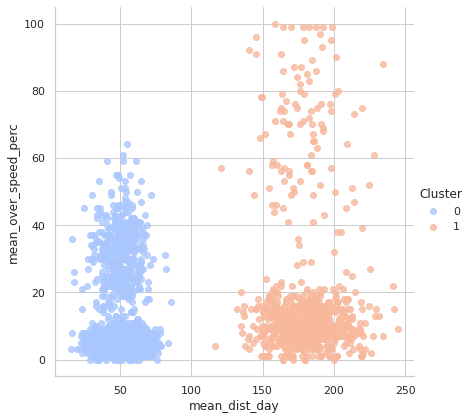

In [31]:
df_analyze['Cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=df_analyze
           ,hue='Cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [36]:
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(df.drop("id",axis=1))
print(kmeans_4.cluster_centers_) 


[[180.34311782  10.52011494]
 [ 49.99263253   5.20447169]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]


In [37]:
unique,counts =np.unique(kmeans_4.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 696, 1: 2773, 2: 104, 3: 427}


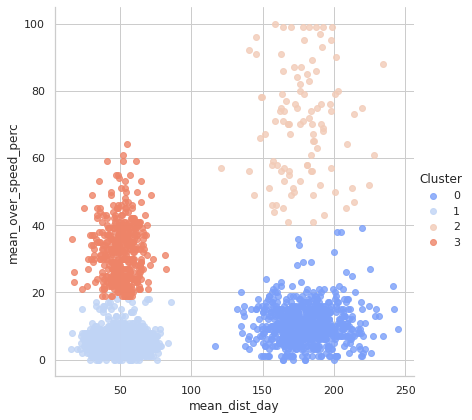

In [38]:
df_analyze['Cluster']=kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=df_analyze
           ,hue='Cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)